When the correlation between A and B is monitored, anomalies can be detected earlier because when the sensor B data start to increase, the correlation between A and B will change correspondingly. Because the change is abrupt, it can be detected more easily. In fact, the correlation can be considered as a logistic variable in this case, which makes it more sensitive than sensor data. The correlation-based method can detect anomalies better than the method using only sensor data. However, sensor data may be more sensitive to certain kinds of failures. Therefore, we actually combined CCs with sensor data to achieve a better performance.




In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Anomaly_points_by_model_Parameter1 (2).xlsx to Anomaly_points_by_model_Parameter1 (2).xlsx


In [ ]:
data = pd.read_excel('Anomaly_points_by_model_Parameter1 (2).xlsx')

In [ ]:
data

,TAG,A_431FM1_F1,B_431FM2_F1,C_431BE1_JT,D_441CN1A_1B_TT01,E_451PC1_TT01,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,N_461KL1_AT_NO,C_441CN1A_TT03,D_441CN1A_TT02,E_441CN1B_TT03,F_441CN1B_TT02,G_441CN2_TT01,H_441CN2_TT02,I_441CN3_TT01,J_441CN3_TT02,K_441CN4_TT01,L_441CN4_TT02,M_441CN5_TT01,N_441CN5_TT02,L_451PC1_PT01,M_451PC1_PT03,N_461KL1_PT01,E_481FM1_FI
0,2019-06-03 02:00:00,0.0,273.0,95.6,345.7,959.0,1122.6,5.0,381.0,373.4,84.4,336.6,345.5,353.4,336.6,367.4,367.4,585.1,581.4,797.5,785.2,929.3,999.3,-152.4,-34.1,-38.0,9.3
1,2019-06-03 03:00:00,0.0,267.3,94.3,345.5,956.5,1132.7,4.3,393.4,338.1,142.0,338.8,344.0,353.4,335.5,367.0,367.1,583.9,581.0,794.8,785.8,922.3,997.6,-123.9,-36.2,-27.4,9.1
2,2019-06-03 04:00:00,0.0,272.9,96.0,343.8,952.8,1136.6,4.4,400.1,354.6,215.6,338.2,339.3,351.7,334.3,365.1,365.3,583.1,579.3,787.0,782.5,914.6,1005.2,-144.9,-35.4,-25.7,9.5
3,2019-06-03 05:00:00,0.0,272.7,96.2,345.3,960.7,1145.0,4.9,385.4,370.7,271.7,339.7,330.0,353.0,335.7,367.1,366.9,584.1,581.0,774.6,786.6,901.0,1016.4,-145.2,-37.0,-40.0,9.4
4,23/06/2019 07:00:00,0.0,270.0,96.9,339.3,963.6,1122.7,5.0,372.0,360.4,226.6,325.7,336.3,345.9,328.8,357.3,357.0,570.1,565.3,768.4,759.4,846.3,1037.7,-156.9,-25.1,-46.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,28/01/2020 07:00:00,245.7,0.0,95.7,310.2,930.4,1105.9,3.7,425.7,329.1,186.9,295.9,294.9,314.9,302.6,467.3,463.6,628.2,633.1,774.6,786.5,910.2,942.3,-105.0,-30.1,-5.1,8.1
217,28/01/2020 08:00:00,190.6,0.0,82.9,348.7,952.0,1026.8,2.9,428.2,261.2,176.7,338.1,325.7,355.4,337.9,510.6,507.0,649.7,655.1,763.0,796.6,921.5,965.9,-20.1,-15.3,-11.1,6.3
218,28/01/2020 09:00:00,215.1,0.0,86.6,340.3,956.4,1232.1,2.5,462.4,261.8,247.1,336.6,331.6,347.4,328.3,519.3,502.1,682.5,702.0,802.4,810.9,936.5,964.5,-24.8,-11.6,-7.1,6.6
219,21/02/2020 06:00:00,0.0,265.4,103.8,340.9,963.9,1235.4,4.1,423.6,356.6,368.7,351.0,345.0,347.2,339.4,388.1,371.6,602.2,607.9,814.2,789.3,919.7,1044.1,-125.3,-27.7,-32.2,10.4


In [ ]:
#data2 = data.drop(columns=['TAG'], axis = 1)
data2 = data.drop(data.columns[0], axis = 1)
data2

,A_431FM1_F1,B_431FM2_F1,C_431BE1_JT,D_441CN1A_1B_TT01,E_451PC1_TT01,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,N_461KL1_AT_NO,C_441CN1A_TT03,D_441CN1A_TT02,E_441CN1B_TT03,F_441CN1B_TT02,G_441CN2_TT01,H_441CN2_TT02,I_441CN3_TT01,J_441CN3_TT02,K_441CN4_TT01,L_441CN4_TT02,M_441CN5_TT01,N_441CN5_TT02,L_451PC1_PT01,M_451PC1_PT03,N_461KL1_PT01,E_481FM1_FI
0,0.0,273.0,95.6,345.7,959.0,1122.6,5.0,381.0,373.4,84.4,336.6,345.5,353.4,336.6,367.4,367.4,585.1,581.4,797.5,785.2,929.3,999.3,-152.4,-34.1,-38.0,9.3
1,0.0,267.3,94.3,345.5,956.5,1132.7,4.3,393.4,338.1,142.0,338.8,344.0,353.4,335.5,367.0,367.1,583.9,581.0,794.8,785.8,922.3,997.6,-123.9,-36.2,-27.4,9.1
2,0.0,272.9,96.0,343.8,952.8,1136.6,4.4,400.1,354.6,215.6,338.2,339.3,351.7,334.3,365.1,365.3,583.1,579.3,787.0,782.5,914.6,1005.2,-144.9,-35.4,-25.7,9.5
3,0.0,272.7,96.2,345.3,960.7,1145.0,4.9,385.4,370.7,271.7,339.7,330.0,353.0,335.7,367.1,366.9,584.1,581.0,774.6,786.6,901.0,1016.4,-145.2,-37.0,-40.0,9.4
4,0.0,270.0,96.9,339.3,963.6,1122.7,5.0,372.0,360.4,226.6,325.7,336.3,345.9,328.8,357.3,357.0,570.1,565.3,768.4,759.4,846.3,1037.7,-156.9,-25.1,-46.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,245.7,0.0,95.7,310.2,930.4,1105.9,3.7,425.7,329.1,186.9,295.9,294.9,314.9,302.6,467.3,463.6,628.2,633.1,774.6,786.5,910.2,942.3,-105.0,-30.1,-5.1,8.1
217,190.6,0.0,82.9,348.7,952.0,1026.8,2.9,428.2,261.2,176.7,338.1,325.7,355.4,337.9,510.6,507.0,649.7,655.1,763.0,796.6,921.5,965.9,-20.1,-15.3,-11.1,6.3
218,215.1,0.0,86.6,340.3,956.4,1232.1,2.5,462.4,261.8,247.1,336.6,331.6,347.4,328.3,519.3,502.1,682.5,702.0,802.4,810.9,936.5,964.5,-24.8,-11.6,-7.1,6.6
219,0.0,265.4,103.8,340.9,963.9,1235.4,4.1,423.6,356.6,368.7,351.0,345.0,347.2,339.4,388.1,371.6,602.2,607.9,814.2,789.3,919.7,1044.1,-125.3,-27.7,-32.2,10.4


In [ ]:
d = data2.columns[:]
d

Index(['A_431FM1_F1', 'B_431FM2_F1', 'C_431BE1_JT', 'D_441CN1A_1B_TT01',
       'E_451PC1_TT01', 'H_461KL1_PYRO_MTR', 'I_Kiln RPM', 'J_461KL1_IZ',
       'K_461KL1_JZ_EM', 'N_461KL1_AT_NO', 'C_441CN1A_TT03', 'D_441CN1A_TT02',
       'E_441CN1B_TT03', 'F_441CN1B_TT02', 'G_441CN2_TT01', 'H_441CN2_TT02',
       'I_441CN3_TT01', 'J_441CN3_TT02', 'K_441CN4_TT01', 'L_441CN4_TT02',
       'M_441CN5_TT01', 'N_441CN5_TT02', 'L_451PC1_PT01', 'M_451PC1_PT03',
       'N_461KL1_PT01', 'E_481FM1_FI'],
      dtype='object')

                   A_431FM1_F1  B_431FM2_F1  ...  N_461KL1_PT01  E_481FM1_FI
A_431FM1_F1           1.000000    -0.969821  ...       0.283903     0.430958
B_431FM2_F1          -0.969821     1.000000  ...      -0.371164    -0.236922
C_431BE1_JT           0.680108    -0.485686  ...      -0.065565     0.822966
D_441CN1A_1B_TT01    -0.592555     0.563023  ...      -0.178341    -0.293995
E_451PC1_TT01        -0.247937     0.185455  ...      -0.099701    -0.599841
H_461KL1_PYRO_MTR    -0.220211     0.260574  ...       0.053377     0.098315
I_Kiln RPM           -0.441290     0.538804  ...      -0.152007     0.154683
J_461KL1_IZ           0.489375    -0.454783  ...      -0.188177     0.087386
K_461KL1_JZ_EM        0.239631    -0.098203  ...      -0.363494     0.305221
N_461KL1_AT_NO        0.309799    -0.246664  ...       0.008638     0.393972
C_441CN1A_TT03       -0.121955     0.181344  ...      -0.203089     0.148205
D_441CN1A_TT02       -0.511082     0.485208  ...       0.002221    -0.302359

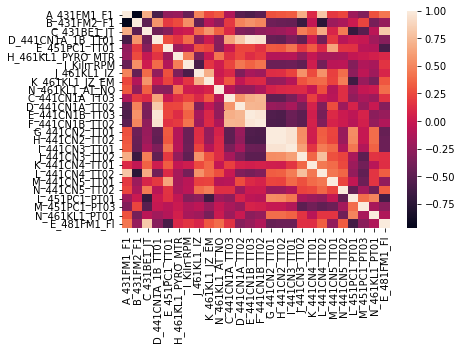

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data[d].corr() #corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded.
print(corr) # is correation matrix
print(type(corr))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [ ]:
def value_seperator(a):
  if 0.6<a and a<=1:
    b = '2:lot of correlation'
  elif 0.2<a and a<=0.6:
    b = '1:moderate correlation'
  elif -0.2<a and a<=0.2:
    b = '0:no correlation'
  elif -0.6<a and a<=-0.2:
    b = '-1:moderately_neg'
  else:
    b = '-2:opp. correlation'
  return b

In [ ]:
corr.applymap(lambda x: value_seperator(x)) 

,A_431FM1_F1,B_431FM2_F1,C_431BE1_JT,D_441CN1A_1B_TT01,E_451PC1_TT01,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,N_461KL1_AT_NO,C_441CN1A_TT03,D_441CN1A_TT02,E_441CN1B_TT03,F_441CN1B_TT02,G_441CN2_TT01,H_441CN2_TT02,I_441CN3_TT01,J_441CN3_TT02,K_441CN4_TT01,L_441CN4_TT02,M_441CN5_TT01,N_441CN5_TT02,L_451PC1_PT01,M_451PC1_PT03,N_461KL1_PT01,E_481FM1_FI
A_431FM1_F1,2:lot of correlation,-2:opp. correlation,2:lot of correlation,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,1:moderate correlation,1:moderate correlation,1:moderate correlation,0:no correlation,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,1:moderate correlation,1:moderate correlation,1:moderate correlation,2:lot of correlation,0:no correlation,2:lot of correlation,0:no correlation,1:moderate correlation,-1:moderately_neg,-1:moderately_neg,1:moderate correlation,1:moderate correlation
B_431FM2_F1,-2:opp. correlation,2:lot of correlation,-1:moderately_neg,1:moderate correlation,0:no correlation,1:moderate correlation,1:moderate correlation,-1:moderately_neg,0:no correlation,-1:moderately_neg,0:no correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,-2:opp. correlation,0:no correlation,-2:opp. correlation,-1:moderately_neg,0:no correlation,0:no correlation,1:moderate correlation,-1:moderately_neg,-1:moderately_neg
C_431BE1_JT,2:lot of correlation,-1:moderately_neg,2:lot of correlation,-1:moderately_neg,-1:moderately_neg,0:no correlation,0:no correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,0:no correlation,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,0:no correlation,1:moderate correlation,1:moderate correlation,2:lot of correlation,0:no correlation,1:moderate correlation,-2:opp. correlation,-1:moderately_neg,0:no correlation,2:lot of correlation
D_441CN1A_1B_TT01,-1:moderately_neg,1:moderate correlation,-1:moderately_neg,2:lot of correlation,1:moderate correlation,0:no correlation,1:moderate correlation,-1:moderately_neg,0:no correlation,-1:moderately_neg,2:lot of correlation,2:lot of correlation,2:lot of correlation,2:lot of correlation,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,0:no correlation,-1:moderately_neg,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,-1:moderately_neg
E_451PC1_TT01,-1:moderately_neg,0:no correlation,-1:moderately_neg,1:moderate correlation,2:lot of correlation,-1:moderately_neg,0:no correlation,1:moderate correlation,1:moderate correlation,-1:moderately_neg,0:no correlation,1:moderate correlation,1:moderate correlation,0:no correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,2:lot of correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,-1:moderately_neg
H_461KL1_PYRO_MTR,-1:moderately_neg,1:moderate correlation,0:no correlation,0:no correlation,-1:moderately_neg,2:lot of correlation,1:moderate correlation,-1:moderately_neg,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,-1:moderately_neg,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation
I_Kiln RPM,-1:moderately_neg,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,2:lot of correlation,-1:moderately_neg,0:no correlation,0:no correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,-1:moderately_neg,0:no correlation,-1:moderately_neg,0:no correlation,0:no correlation,-1:moderately_neg,0:no correlation,0:no correlation,0:no correlation
J_461KL1_IZ,1:moderate correlati

In [ ]:
corr

,A_431FM1_F1,B_431FM2_F1,C_431BE1_JT,D_441CN1A_1B_TT01,E_451PC1_TT01,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,N_461KL1_AT_NO,C_441CN1A_TT03,D_441CN1A_TT02,E_441CN1B_TT03,F_441CN1B_TT02,G_441CN2_TT01,H_441CN2_TT02,I_441CN3_TT01,J_441CN3_TT02,K_441CN4_TT01,L_441CN4_TT02,M_441CN5_TT01,N_441CN5_TT02,L_451PC1_PT01,M_451PC1_PT03,N_461KL1_PT01,E_481FM1_FI
A_431FM1_F1,1.000000,-0.969821,0.680108,-0.592555,-0.247937,-0.220211,-0.441290,0.489375,0.239631,0.309799,-0.121955,-0.511082,-0.568398,-0.498877,0.279401,0.305811,0.328219,0.678096,0.113580,0.800977,0.177912,0.235003,-0.200091,-0.320370,0.283903,0.430958
B_431FM2_F1,-0.969821,1.000000,-0.485686,0.563023,0.185455,0.260574,0.538804,-0.454783,-0.098203,-0.246664,0.181344,0.485208,0.555319,0.505428,-0.410725,-0.434310,-0.446689,-0.667076,-0.030904,-0.741780,-0.204305,-0.135006,0.009414,0.231517,-0.371164,-0.236922
C_431BE1_JT,0.680108,-0.485686,1.000000,-0.403535,-0.307688,-0.012965,0.025393,0.389381,0.567781,0.343932,0.111384,-0.325762,-0.358482,-0.261568,-0.219902,-0.202792,-0.140835,0.466602,0.351045,0.669745,0.086047,0.448432,-0.686375,-0.521208,-0.065565,0.822966
D_441CN1A_1B_TT01,-0.592555,0.563023,-0.403535,1.000000,0.263099,0.158907,0.391282,-0.252525,0.020399,-0.274420,0.634850,0.822345,0.971326,0.948754,-0.452366,-0.471234,-0.331944,-0.476035,0.033165,-0.393495,0.179503,-0.069666,0.013773,-0.012405,-0.178341,-0.293995
E_451PC1_TT01,-0.247937,0.185455,-0.307688,0.263099,1.000000,-0.205805,-0.105077,0.278223,0.225248,-0.296301,0.003991,0.237676,0.232678,0.146386,0.319480,0.303528,0.430238,0.184329,0.323816,0.112471,0.644059,0.156205,0.153333,-0.073618,-0.099701,-0.599841
H_461KL1_PYRO_MTR,-0.220211,0.260574,-0.012965,0.158907,-0.205805,1.000000,0.463190,-0.345448,0.006854,0.423660,0.134338,0.245123,0.123815,0.186891,-0.099117,-0.095472,-0.084678,-0.241974,-0.018296,-0.160866,-0.158087,-0.146102,-0.024726,0.014100,0.053377,0.098315
I_Kiln RPM,-0.441290,0.538804,0.025393,0.391282,-0.105077,0.463190,1.000000,-0.580076,0.165787,0.035763,0.231517,0.430881,0.350117,0.415473,-0.429022,-0.428782,-0.413565,-0.474237,0.037426,-0.379896,-0.066147,-0.056840,-0.310741,-0.111532,-0.152007,0.154683
J_461KL1_IZ,0.489375,-0.454783,0.389381,-0.252525,0.278223,-0.345448,-0.580076,1.000000,0.690963,0.007891,0.100845,-0.335007,-0.153957,-0.193715,0.124447,0.132738,0.226207,0.555114,0.257066,0.559321,0.212876,0.396987,-0.263751,-0.047412,-0.188177,0.087386
K_461KL1_JZ_EM,0.239631,-0.098203,0.567781,0.020399,0.225248,0.006854,0.165787,0.690963,1.000000,0.070607,0.307418,-0.035596,0.093404,0.107443,-0.235929,-0.226382,-0.090351,0.291308,0.376423,0.390340,0.225782,0.463461,-0.643391,-0.220309,-0.363494,0.305221
N_461KL1_AT_NO,0.309799,-0.246664,0.343932,-0.274420,-0.296301,0.423660,0.035763,0.007891,0.070607,1.000000,-0.078746,-0.251884,-0.253323,-0.124500,0.066468,0.092495,0.113856,0.119993,-0.019289,0.276409,-0.090330,0.132194,-0.194090,-0.017883,0.008638,0.393972


In [ ]:
# first we have to convert the matrix to one-dimensional series. The unstack() function is used to do so. The series will have multiple index.
# For sorting sort_values() function is used. The sort_values() function sorts a data frame in Ascending or Descending order of passed Column. 
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)) # k = 1 for upper triu
unique_corr_pairs = upper_corr_mat.unstack().dropna() # to drop null values which is essentially lower matrix
sorted_mat = unique_corr_pairs.sort_values()
print(type(sorted_mat)) #One-dimensional ndarray with axis labels
#print(sorted_mat[0])
N_Mcolumn = sorted_mat.to_frame()
N_Mcolumn = pd.DataFrame(N_Mcolumn)

<class 'pandas.core.series.Series'>


In [ ]:
def outliers(data):
  Q1 = data.quantile(0.25)
  #print(Q1)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1 # interquatile range.
  outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(outliers.shape)
  return outliers

In [ ]:
N_Mcolumn.columns = ['0']
print(N_Mcolumn.columns)
print(N_Mcolumn['0'])

# so here we observe max correlation between Unnammed 7 and unnamed: 8.1 
# the outliers in the scatter plot of these two columns will be our anomaly points and using these we shall make out train and test data

Index(['0'], dtype='object')
B_431FM2_F1     A_431FM1_F1         -0.969821
L_441CN4_TT02   B_431FM2_F1         -0.741780
L_451PC1_PT01   C_431BE1_JT         -0.686375
J_441CN3_TT02   B_431FM2_F1         -0.667076
L_451PC1_PT01   K_461KL1_JZ_EM      -0.643391
                                       ...   
I_441CN3_TT01   H_441CN2_TT02        0.958707
                G_441CN2_TT01        0.960738
F_441CN1B_TT02  E_441CN1B_TT03       0.969511
E_441CN1B_TT03  D_441CN1A_1B_TT01    0.971326
H_441CN2_TT02   G_441CN2_TT01        0.997818
Name: 0, Length: 325, dtype: float64


So here a wonderfull thing is happening the above printed dataframe is of dimension X*1. Basically the way we converted the corr matric to this dataframe lead to this problem. And there's a very funny and intersting solution to it. What I will do is that I shall save this to csv file. Now I shall read that csv file, using pandas read_csv function.

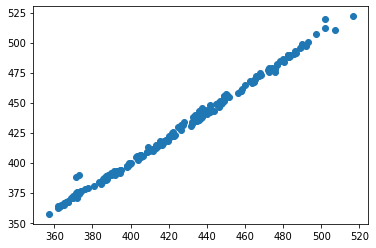

In [ ]:
plt.scatter(data['H_441CN2_TT02'], data['G_441CN2_TT01'])
plt.show()

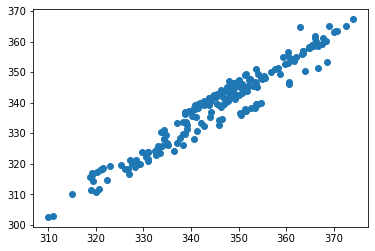

In [ ]:
plt.scatter(data['E_441CN1B_TT03'], data['D_441CN1A_1B_TT01'])
plt.show()

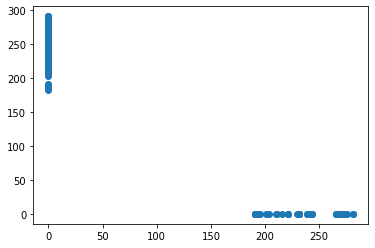

In [ ]:
plt.scatter(data['B_431FM2_F1'], data['A_431FM1_F1'])
plt.show()

In [ ]:
N_Mcolumn.to_csv('corr_between_H_441CN2_TT02_&_G_441CN2_TT01') # saving it to a csv file that can be used for later purposes.

In [ ]:
X = pd.DataFrame(data=np.array([data['H_441CN2_TT02'],data['G_441CN2_TT01']]).T, columns=['H_441CN2_TT02','G_441CN2_TT01'])
X

,H_441CN2_TT02,G_441CN2_TT01
0,367.4,367.4
1,367.1,367.0
2,365.3,365.1
3,366.9,367.1
4,357.0,357.3
...,...,...
216,463.6,467.3
217,507.0,510.6
218,502.1,519.3
219,371.6,388.1


In [ ]:
import sklearn

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=5,eps = 11)#DBSCAN stands for Density-based spatial clustering of applications with noise
dbscan.fit(X)
# I performed DBSCAN instead of K-means as on seeing the distribution of the points in the plane I can be clearly noted that K-means will perform miserby. 

DBSCAN(eps=11)

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1])

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique used to visualize and explore high-dimensional data. It was introduces by van der Maaten and Hinton in 2008. t-SNE creates a 2-D visual representation of multi-dimensional data while preserving local similarities and spacial relationships between data points in their original, higher dimensionality. Essentially, it can help us understand how data is distributed and arranged in high-dimensional space.

Plotly is an interactive, open-source graphing library for Python. Plotly describes itself as “the front-end for ML and data science models”. Below is a very simple use case for Plotly. It uses t-SNE technique

In [ ]:
import plotly.express as px   
fig = px.scatter(X, x="H_441CN2_TT02", y="G_441CN2_TT01",color= dbscan.labels_, size_max=60)
fig.update_layout(height=600)
fig.show()

In [ ]:
 X['LABELS'] = dbscan.labels_
 train_for_2_columns = X
 train_for_2_columns

,H_441CN2_TT02,G_441CN2_TT01,LABELS
0,367.4,367.4,0
1,367.1,367.0,0
2,365.3,365.1,0
3,366.9,367.1,0
4,357.0,357.3,0
...,...,...,...
216,463.6,467.3,0
217,507.0,510.6,-1
218,502.1,519.3,-1
219,371.6,388.1,-1


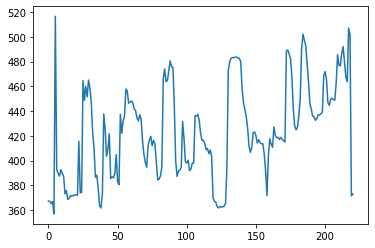

In [ ]:
data['H_441CN2_TT02'].plot()
plt.show()

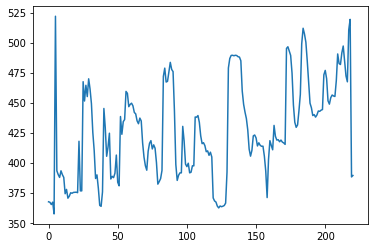

In [ ]:
data['G_441CN2_TT01'].plot()
plt.show()

###Main part of the code starts from here. 


In [ ]:
N_Mcolumn.columns
#type(N_Mcolumn)
#This is the default index type used by DataFrame and Series when no explicit index is provided by the user.

Index(['0'], dtype='object')

In [ ]:
N_Mcolumn

0
B_431FM2_F1    A_431FM1_F1       -0.969821
L_441CN4_TT02  B_431FM2_F1       -0.741780
L_451PC1_PT01  C_431BE1_JT       -0.686375
J_441CN3_TT02  B_431FM2_F1       -0.667076
L_451PC1_PT01  K_461KL1_JZ_EM    -0.643391
...                                    ...
I_441CN3_TT01  H_441CN2_TT02      0.958707
               G_441CN2_TT01      0.960738
F_441CN1B_TT02 E_441CN1B_TT03     0.969511
E_441CN1B_TT03 D_441CN1A_1B_TT01  0.971326
H_441CN2_TT02  G_441CN2_TT01      0.997818

[325 rows x 1 columns]

In [ ]:
def neg_to_negone(x):
  if x<0:
    x = None
  return x

DataFrame.applymap(func, na_action=None, **kwargs)[source]
Apply a function to a Dataframe elementwise.

This method applies a function that accepts and returns a scalar to every element of a

In [ ]:
file = pd.read_csv('corr_between_H_441CN2_TT02_&_G_441CN2_TT01')
file
file['0'] = file['0'].apply(lambda x: neg_to_negone(x))
print(file)

         Unnamed: 0         Unnamed: 1         0
0       B_431FM2_F1        A_431FM1_F1       NaN
1     L_441CN4_TT02        B_431FM2_F1       NaN
2     L_451PC1_PT01        C_431BE1_JT       NaN
3     J_441CN3_TT02        B_431FM2_F1       NaN
4     L_451PC1_PT01     K_461KL1_JZ_EM       NaN
..              ...                ...       ...
320   I_441CN3_TT01      H_441CN2_TT02  0.958707
321   I_441CN3_TT01      G_441CN2_TT01  0.960738
322  F_441CN1B_TT02     E_441CN1B_TT03  0.969511
323  E_441CN1B_TT03  D_441CN1A_1B_TT01  0.971326
324   H_441CN2_TT02      G_441CN2_TT01  0.997818

[325 rows x 3 columns]


In [ ]:
file.dropna(inplace= True)
file = file[::-1]
file.to_csv('temp')
positive_data = pd.read_csv('temp')
positive_data.drop('Unnamed: 0', axis=1, inplace=True)
#positive_data = positive_data.iloc[::-1]
print(positive_data)


       Unnamed: 0.1         Unnamed: 1         0
0     H_441CN2_TT02      G_441CN2_TT01  0.997818
1    E_441CN1B_TT03  D_441CN1A_1B_TT01  0.971326
2    F_441CN1B_TT02     E_441CN1B_TT03  0.969511
3     I_441CN3_TT01      G_441CN2_TT01  0.960738
4     I_441CN3_TT01      H_441CN2_TT02  0.958707
..              ...                ...       ...
166  N_461KL1_AT_NO        J_461KL1_IZ  0.007891
167  K_461KL1_JZ_EM  H_461KL1_PYRO_MTR  0.006854
168  C_441CN1A_TT03      E_451PC1_TT01  0.003991
169   N_461KL1_PT01     D_441CN1A_TT02  0.002221
170   L_441CN4_TT02     C_441CN1A_TT03  0.001306

[171 rows x 3 columns]


In [ ]:
positive_data.columns = ['first_value', 'second_value', 'corr']

In [ ]:
positive_data

,first_value,second_value,corr
0,H_441CN2_TT02,G_441CN2_TT01,0.997818
1,E_441CN1B_TT03,D_441CN1A_1B_TT01,0.971326
2,F_441CN1B_TT02,E_441CN1B_TT03,0.969511
3,I_441CN3_TT01,G_441CN2_TT01,0.960738
4,I_441CN3_TT01,H_441CN2_TT02,0.958707
...,...,...,...
166,N_461KL1_AT_NO,J_461KL1_IZ,0.007891
167,K_461KL1_JZ_EM,H_461KL1_PYRO_MTR,0.006854
168,C_441CN1A_TT03,E_451PC1_TT01,0.003991
169,N_461KL1_PT01,D_441CN1A_TT02,0.002221


In [ ]:
positive_data.to_csv("pos_data")

In [ ]:
positive_data.sort_values(by = ['first_value','corr'], ascending=[True,False], inplace= True)
positive_data.head(50)

,first_value,second_value,corr
15,C_431BE1_JT,A_431FM1_F1,0.680108
19,C_441CN1A_TT03,D_441CN1A_1B_TT01,0.634850
74,C_441CN1A_TT03,K_461KL1_JZ_EM,0.307418
97,C_441CN1A_TT03,I_Kiln RPM,0.231517
108,C_441CN1A_TT03,B_431FM2_F1,0.181344
124,C_441CN1A_TT03,H_461KL1_PYRO_MTR,0.134338
135,C_441CN1A_TT03,C_431BE1_JT,0.111384
137,C_441CN1A_TT03,J_461KL1_IZ,0.100845
168,C_441CN1A_TT03,E_451PC1_TT01,0.003991
22,D_441CN1A_1B_TT01,B_431FM2_F1,0.563023


In [ ]:
len(positive_data)

171

In [ ]:
positive_data.index

Int64Index([ 15,  19,  74,  97, 108, 124, 135, 137, 168,  22,
            ...
             50,  53,  63,  79, 111, 112, 115, 150, 165, 169],
           dtype='int64', length=171)

first we shall sort the dataframe based on multiple columns. That is column 1 will be sorted at first and then column 3 shall be sorted in descending order.

the gaussian_funcition will output me

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
def gaussian_function(X):
  gm = GaussianMixture(n_components=1, n_init=10)
  gm.fit(X)
  #print(gm.means_)
  #print(gm.covariances_)
  densities = gm.score_samples(X)
 #print(densities)
  density_threshold = np.percentile(densities,1.6)
 #print(density_threshold)
  min_density = min(densities)
 # print([densities<density_threshold && densities<min_density])
  density_threshold = min(density_threshold,0.75*min_density)
 # print([densities<density_threshold])
  anomalies = X[densities<density_threshold] 

  return anomalies

In [ ]:
X = np.vstack((data2['C_441CN1A_TT03'], data2['D_441CN1A_1B_TT01'])).T
print(gaussian_function(X))

[[321.2 302.8]
 [327.6 302.6]
 [295.9 310.2]]


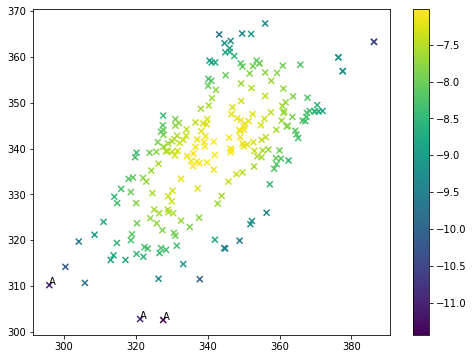

In [ ]:
def gaussian_functionss(X):
  gm = GaussianMixture(n_components=1, n_init=10)
  gm.fit(X)
  densities = gm.score_samples(X)
  return densities
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=gaussian_functionss(X),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X):
  plt.annotate('A', tuple(i))

In [ ]:
# plt.scatter(data['C_431BE1_JT'], data['A_431FM1_F1'])
# plt.show()

[[321.2 302.8]
 [327.6 302.6]
 [295.9 310.2]]


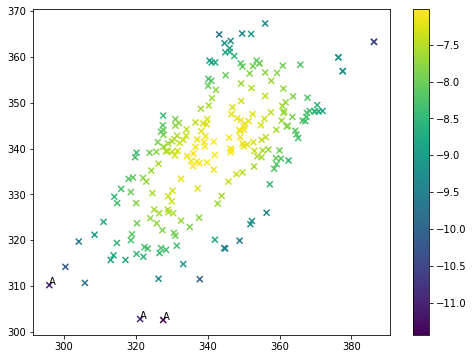

In [ ]:
X1 = np.vstack((data2['C_441CN1A_TT03'], data2['D_441CN1A_1B_TT01'])).T
print(gaussian_function(X1))
plt.figure(figsize=(8,6))
plt.scatter(X1[:,0],X1[:,1],marker="x",c=gaussian_functionss(X1),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X1):
  plt.annotate('A', tuple(i))
# for i in gaussian_functionss(X1):
#   if i<0.0251:
#     plt.annotate(str(i), )


[[386.3 324.9]
 [386.3 324.9]
 [318.6 208.2]
 [326.3 203.3]]


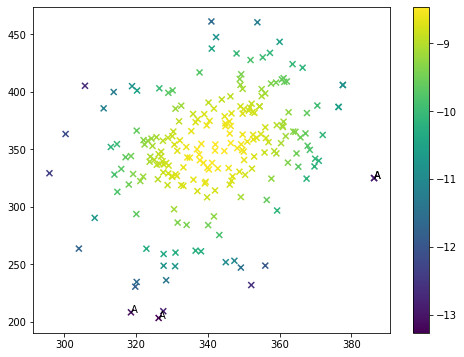

In [ ]:
X1 = np.vstack((data2['C_441CN1A_TT03'], data2['K_461KL1_JZ_EM'])).T
print(gaussian_function(X1))
plt.figure(figsize=(8,6))
plt.scatter(X1[:,0],X1[:,1],marker="x",c=gaussian_functionss(X1),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X1):
  plt.annotate('A', tuple(i))

[[ 352.1 1055.4]]


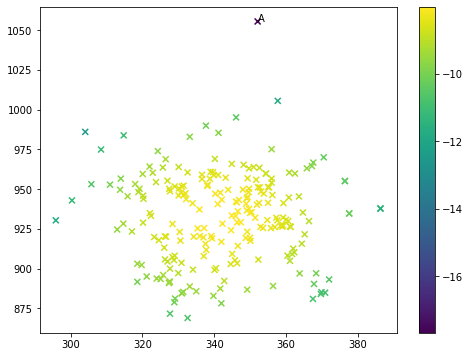

In [ ]:
X1 = np.vstack((data2['C_441CN1A_TT03'], data2['E_451PC1_TT01'])).T
print(gaussian_function(X1))
plt.figure(figsize=(8,6))
plt.scatter(X1[:,0],X1[:,1],marker="x",c=gaussian_functionss(X1),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X1):
  plt.annotate('A', tuple(i))

[[386.3   3.5]
 [386.3   3.5]
 [359.3   2.6]
 [336.6   2.5]]


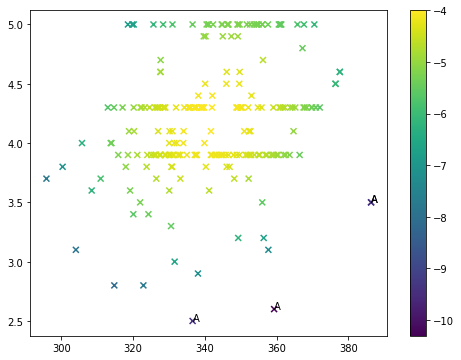

In [ ]:
X2 = np.vstack((data2['C_441CN1A_TT03'], data2['I_Kiln RPM'])).T
print(gaussian_function(X2))
plt.figure(figsize=(8,6))
plt.scatter(X2[:,0],X2[:,1],marker="x",c=gaussian_functionss(X2),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X2):
  plt.annotate('A', tuple(i))

[[386.3 231.5]
 [386.3 231.5]
 [295.9   0. ]]


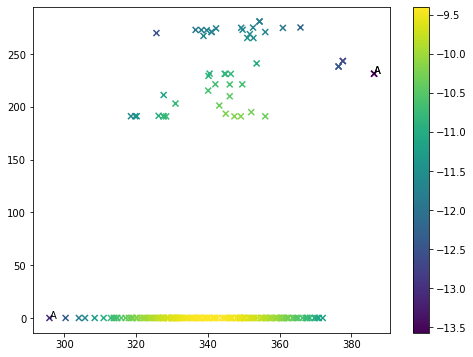

In [ ]:
X3 = np.vstack((data2['C_441CN1A_TT03'], data2['B_431FM2_F1'])).T
print(gaussian_function(X3))
plt.figure(figsize=(8,6))
plt.scatter(X3[:,0],X3[:,1],marker="x",c=gaussian_functionss(X3),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X3):
  plt.annotate('A', tuple(i))

[[312.3 350.4]
 [306.5 353.2]
 [310.9 351.5]
 [309.4 302.8]]


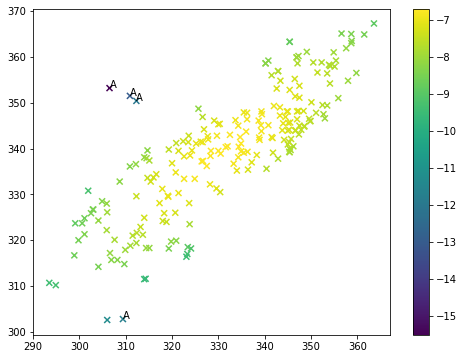

In [ ]:
X4 = np.vstack((data2['D_441CN1A_TT02'], data2['D_441CN1A_1B_TT01'])).T
print(gaussian_function(X4))
plt.figure(figsize=(8,6))
plt.scatter(X4[:,0],X4[:,1],marker="x",c=gaussian_functionss(X4),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X4):
  plt.annotate('A', tuple(i))

[[345.4 386.3]
 [345.4 386.3]
 [293.5 305.8]
 [294.9 295.9]]


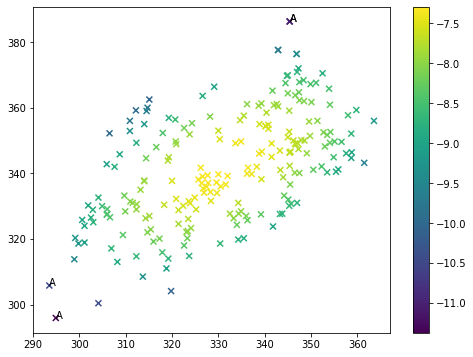

In [ ]:
X5 = np.vstack((data2['D_441CN1A_TT02'], data2['C_441CN1A_TT03'])).T
print(gaussian_function(X5))
plt.figure(figsize=(8,6))
plt.scatter(X5[:,0],X5[:,1],marker="x",c=gaussian_functionss(X5),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X5):
  plt.annotate('A', tuple(i))

[[330.  272.7]
 [340.2 281. ]
 [340.2 281. ]
 [293.5   0. ]]


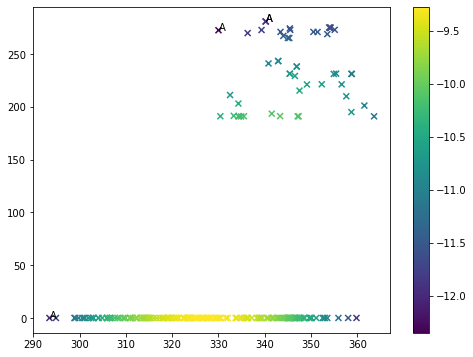

In [ ]:
X6 = np.vstack((data2['D_441CN1A_TT02'], data2['B_431FM2_F1'])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[ 25.6 466. ]]


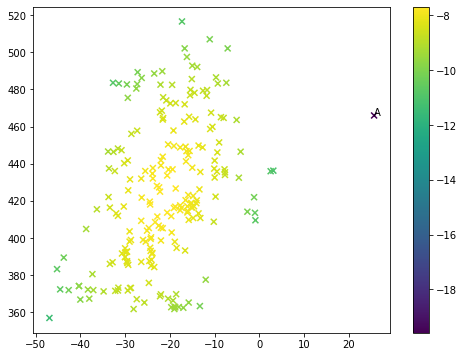

In [ ]:
X6 = np.vstack((data2['N_461KL1_PT01'], data2['H_441CN2_TT02'])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[ 25.6 -58.1]
 [-11.1 -20.1]
 [ -7.1 -24.8]]


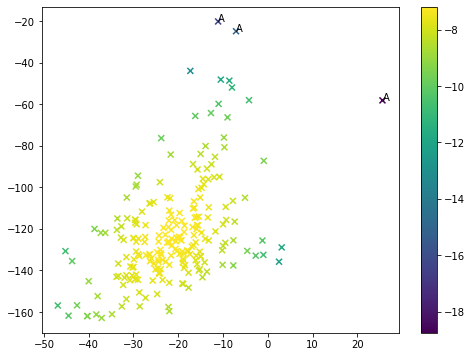

In [ ]:
X6 = np.vstack((data2['N_461KL1_PT01'], data2['L_451PC1_PT01'])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))


[[ 25.6 471.8]]


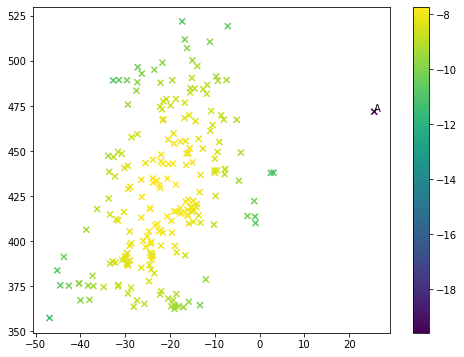

In [ ]:
X6 = np.vstack((data2['N_461KL1_PT01'], data2['G_441CN2_TT01'])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[ 25.6 634.5]]


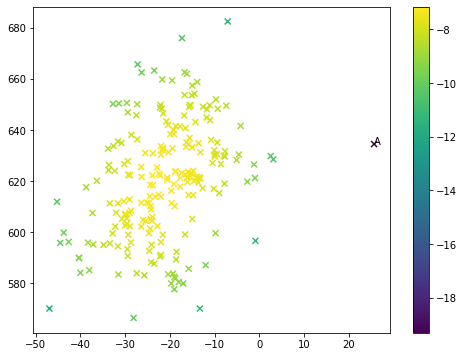

In [ ]:
X6 = np.vstack((data2['N_461KL1_PT01'], data2['I_441CN3_TT01'])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[ 25.6 256.3]]


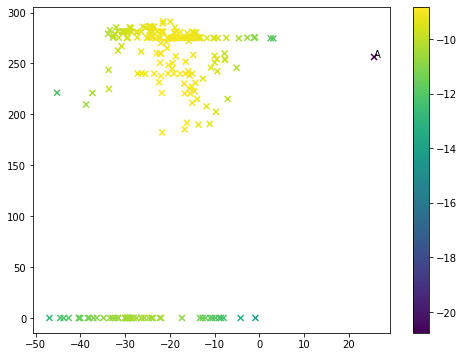

In [ ]:
X6 = np.vstack((data2['N_461KL1_PT01'], data2['A_431FM1_F1'])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[ -45.2  887.5]
 [  25.6 1120.7]]


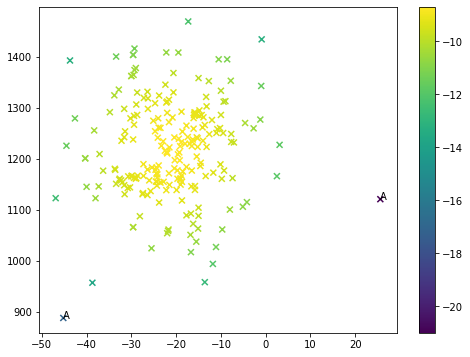

In [ ]:
X6 = np.vstack((data2['N_461KL1_PT01'], data2['H_461KL1_PYRO_MTR'])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[ 25.6 256.3]]


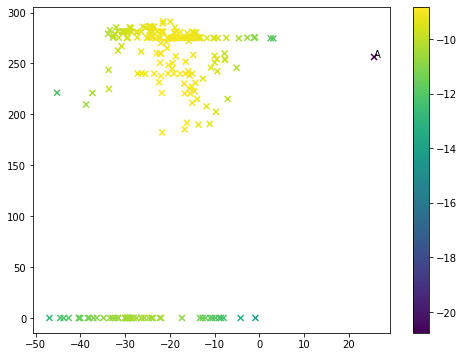

In [ ]:
X6 = np.vstack((data2['N_461KL1_PT01'], data2['A_431FM1_F1'])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[371.6 388.1]
 [373.1 389.3]]


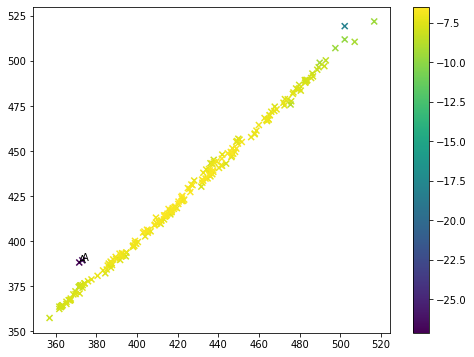

In [ ]:
X6 = np.vstack((data2["H_441CN2_TT02"], data2["G_441CN2_TT01"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

In [ ]:
positive_data.shape

(171, 3)

In [ ]:
positive_data.shape

(171, 3)

[[321.2 302.8]
 [327.6 302.6]
 [295.9 310.2]]


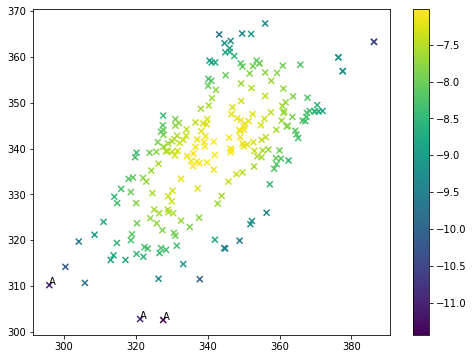

In [ ]:
X6 = np.vstack((data2["C_441CN1A_TT03"], data2["D_441CN1A_1B_TT01"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[386.3 324.9]
 [386.3 324.9]
 [318.6 208.2]
 [326.3 203.3]]


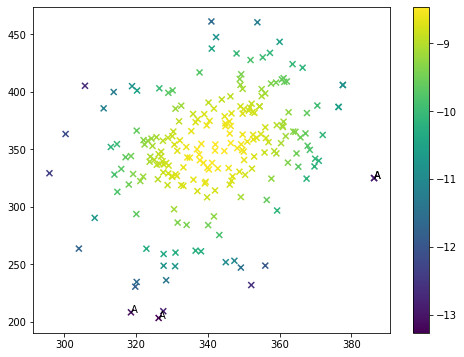

In [ ]:
X6 = np.vstack((data2["C_441CN1A_TT03"], data2["K_461KL1_JZ_EM"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[386.3   3.5]
 [386.3   3.5]
 [359.3   2.6]
 [336.6   2.5]]


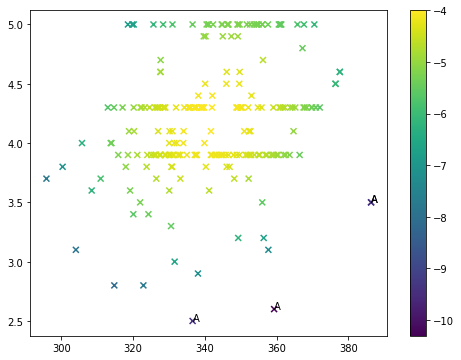

In [ ]:
X6 = np.vstack((data2["C_441CN1A_TT03"], data2["I_Kiln RPM"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[386.3 231.5]
 [386.3 231.5]
 [295.9   0. ]]


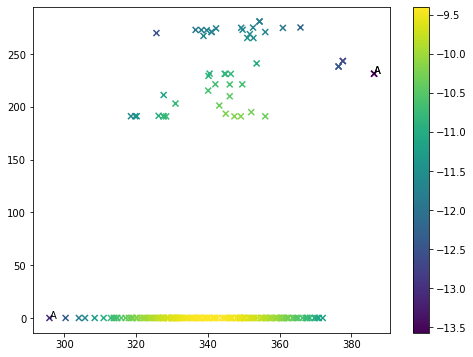

In [ ]:
X6 = np.vstack((data2["C_441CN1A_TT03"], data2["B_431FM2_F1"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[ 386.3 1065.7]
 [ 386.3 1065.7]
 [ 352.2  887.5]
 [ 304.1  993.6]]


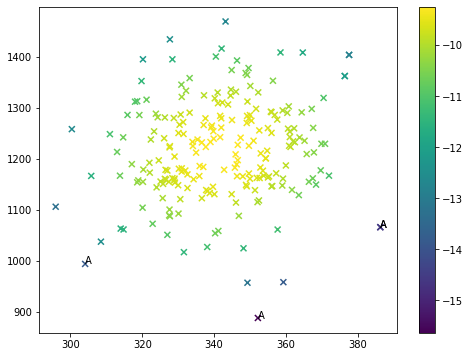

In [ ]:
X6 = np.vstack((data2["C_441CN1A_TT03"], data2["H_461KL1_PYRO_MTR"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[386.3  87.1]
 [386.3  87.1]
 [320.2  73.9]
 [318.6  74.2]]


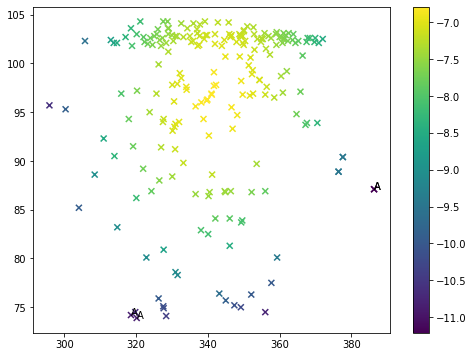

In [ ]:
X6 = np.vstack((data2["C_441CN1A_TT03"], data2["C_431BE1_JT"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[327.6 280.8]
 [319.8 283.9]
 [320.2 286.3]
 [318.6 272. ]]


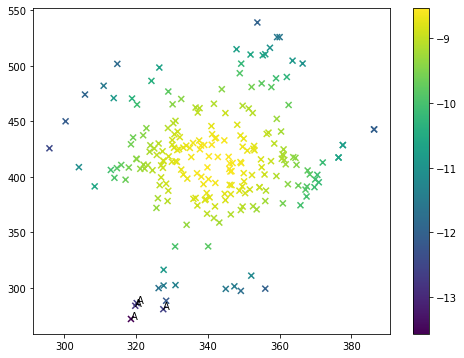

In [ ]:
X6 = np.vstack((data2["C_441CN1A_TT03"], data2["J_461KL1_IZ"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

[[  4.4 356. ]
 [  3.4 352.1]
 [  8.1 295.9]]


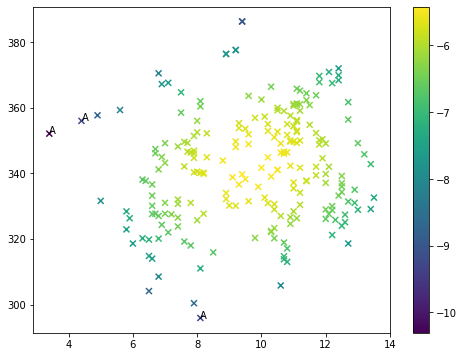

In [ ]:
X6 = np.vstack((data2["E_481FM1_FI"], data2["C_441CN1A_TT03"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

In [ ]:
positive_data = positive_data[~(positive_data['corr'] <= 0.15)]

In [ ]:
positive_data.shape

(120, 3)

To plot the density graph of the column names in the first row. 

In [ ]:
def anomaly_range(Y, total_length,p):
  output_list = []
  error_margin = 0.01*total_length
  gap_width = 0.02*total_length 
  l = []
  for i in Y:
    l.append(i[p])
  l.sort() 
  #print(l)
  last_element = l[len(l)-1]
  maxi = l[0]
  mini = l[0]
  a = 0
  counter = mini
#  print(l)
  while (maxi != last_element or a != len(l)):
    if len(l) == 1:
      output_list.append([mini-error_margin,maxi+error_margin])
      break
    a = a+1
    if (l[a]-counter)<=gap_width:
      counter = l[a]
      if (a == len(l)-1):
        maxi = counter 
        output_list.append([mini-error_margin,maxi+error_margin])
        mini = l[a]
        maxi = mini
        break
      else:
        continue 
    else:
  #    print('here')
      maxi = counter 
   #   print(mini-error_margin,maxi+error_margin)
      output_list.append([mini-error_margin,maxi+error_margin])
      mini = l[a]
      maxi = mini 
      counter = mini
      if a == len(l)-1:
        output_list.append([l[a]-error_margin, l[a]+error_margin])
        break
  return output_list

In [ ]:
def union_and_sort(a,b):
  for i in range(0,len(b)):
    a.append(b[i])
  return sorted(a)
def func(a,b):
  a = union_and_sort(a,b)
  output = []
  output.append(a[0])
  j=1
  for i in range(1, len(a)):
    if (a[i][0] > output[j-1][1]):
      output.append(a[i])
      j = j + 1
    elif (a[i][0] == output[j-1][0]):
      output[j-1][1] = a[i][1]
    else:
      output[j-1][1] = max(output[j-1][1], a[i][1])

  return output



In [ ]:
positive_data.tail(50)

,first_value,second_value,corr
102,K_461KL1_JZ_EM,E_451PC1_TT01,0.225248
113,K_461KL1_JZ_EM,I_Kiln RPM,0.165787
8,L_441CN4_TT02,A_431FM1_F1,0.800977
9,L_441CN4_TT02,J_441CN3_TT02,0.771431
17,L_441CN4_TT02,C_431BE1_JT,0.669745
24,L_441CN4_TT02,J_461KL1_IZ,0.559321
39,L_441CN4_TT02,I_441CN3_TT01,0.460866
41,L_441CN4_TT02,K_441CN4_TT01,0.442691
55,L_441CN4_TT02,K_461KL1_JZ_EM,0.390340
66,L_441CN4_TT02,H_441CN2_TT02,0.340910


[[371.6 388.1]
 [373.1 389.3]]


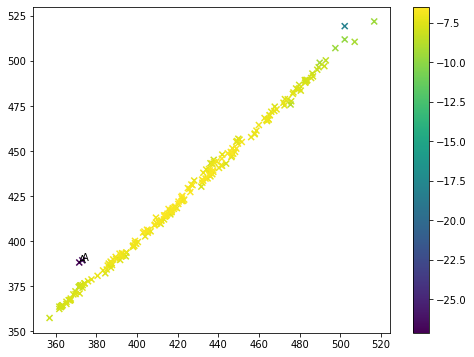

In [ ]:
X6 = np.vstack((data2["H_441CN2_TT02"], data2["G_441CN2_TT01"])).T
print(gaussian_function(X6))
plt.figure(figsize=(8,6))
plt.scatter(X6[:,0],X6[:,1],marker="x",c=gaussian_functionss(X6),cmap='viridis');
plt.colorbar();
for i in gaussian_function(X6):
  plt.annotate('A', tuple(i))

In [ ]:
pa = ''
lis =[]
dic = {}
for u in list(positive_data.index):
  i = list(positive_data.loc[u])

  if i[0] == pa:
    X =  np.vstack((data2[i[0]], data2[i[1]])).T
    total_length_x = max(list(data2[i[0]])) - min(list(data2[i[0]]))
    total_length_y = max(list(data2[i[1]])) - min(list(data2[i[1]]))
    lis.append(gaussian_function(X))
    # if len(list(gaussian_function(X))) == 0:
    #   print("vfbnfvvjfvn")


    
  #  print(gaussian_function(X))
    fe = anomaly_range(gaussian_function(X), total_length_x,0)
  #  print(i[0],fe, end='%%%')
    se = anomaly_range(gaussian_function(X), total_length_y,1)
  #  print(i[1],se)


    if i[0] in dic.keys():
      dic[i[0]] = func(dic[i[0]],fe)
    else:
      dic[i[0]] = fe

    if i[1] in dic.keys():
      dic[i[1]] = func(dic[i[1]],se)
    else:
      dic[i[1]] = se

  else:
    pa = i[0] 
    X = np.vstack((data2[i[0]], data2[i[1]])).T
    lis.append(gaussian_function(X))

#print(lis)
print(dic)

{'C_441CN1A_TT03': [[294.996, 296.804], [299.496, 301.304], [304.896, 306.704], [317.696, 319.504], [320.296, 322.104], [325.396, 328.604], [330.096, 331.904], [335.696, 338.704], [342.296, 344.104], [358.396, 360.204], [385.396, 387.204]], 'K_461KL1_JZ_EM': [[200.723, 211.777], [227.923, 237.177], [256.323, 264.377], [316.623, 321.777], [322.323, 327.477], [346.723, 356.677], [458.423, 463.577]], 'I_Kiln RPM': [[2.475, 2.525], [2.575, 2.625], [2.775, 2.8249999999999997], [3.475, 3.525], [3.6750000000000003, 3.725], [3.875, 3.925], [4.574999999999999, 4.625], [4.975, 5.025]], 'B_431FM2_F1': [[-2.81, 2.81], [192.29, 197.91], [208.49, 214.11], [228.69, 234.31], [262.59, 275.71], [278.19, 283.81]], 'D_441CN1A_TT02': [[292.799, 295.601], [305.799, 307.201], [310.19899999999996, 313.00100000000003], [329.299, 330.701], [339.49899999999997, 340.901], [344.69899999999996, 346.101], [355.19899999999996, 356.601], [357.99899999999997, 360.50100000000003], [360.799, 362.201]], 'H_461KL1_PYRO_MTR

In [ ]:
Anomaly_ranges  =  {'C_441CN1A_TT03': [[294.996, 296.804], [299.496, 301.304], [304.896, 306.704], [317.696, 319.504], [320.296, 322.104], [325.396, 328.604], [330.096, 331.904], [335.696, 338.704], [342.296, 344.104], [358.396, 360.204], [385.396, 387.204]], 'K_461KL1_JZ_EM': [[200.723, 211.777], [227.923, 237.177], [256.323, 264.377], [316.623, 321.777], [322.323, 327.477], [346.723, 356.677], [458.423, 463.577]], 'I_Kiln RPM': [[2.475, 2.525], [2.575, 2.625], [2.775, 2.8249999999999997], [3.475, 3.525], [3.6750000000000003, 3.725], [3.875, 3.925], [4.574999999999999, 4.625], [4.975, 5.025]], 'B_431FM2_F1': [[-2.81, 2.81], [192.29, 197.91], [208.49, 214.11], [228.69, 234.31], [262.59, 275.71], [278.19, 283.81]], 'D_441CN1A_TT02': [[292.799, 295.601], [305.799, 307.201], [310.19899999999996, 313.00100000000003], [329.299, 330.701], [339.49899999999997, 340.901], [344.69899999999996, 346.101], [355.19899999999996, 356.601], [357.99899999999997, 360.50100000000003], [360.799, 362.201]], 'H_461KL1_PYRO_MTR': [[881.679, 893.321], [950.879, 963.621], [1226.279, 1237.9209999999998], [1310.179, 1321.821], [1463.779, 1475.4209999999998]], 'E_451PC1_TT01': [[869.836, 873.5640000000001], [934.736, 938.464], [950.136, 953.864], [954.536, 958.264], [993.236, 996.964], [1053.536, 1057.2640000000001]], 'E_441CN1B_TT03': [[309.36, 311.53999999999996], [314.26, 315.53999999999996], [345.26, 346.53999999999996], [346.56, 348.03999999999996], [359.76, 361.03999999999996], [363.26, 364.53999999999996], [366.06, 367.34], [367.96000000000004, 369.64]], 'E_481FM1_FI': [[3.299, 3.501], [4.299, 4.501], [4.799, 5.001], [5.499, 6.101], [6.499, 6.701], [7.699, 7.901], [8.098999999999998, 8.301], [10.498999999999999, 10.701], [11.699, 11.901000000000002], [12.299, 12.501000000000001]], 'A_431FM1_F1': [[-2.912, 2.912], [179.28799999999998, 185.112], [212.188, 223.812], [253.388, 259.212], [271.788, 278.31199999999995]], 'N_461KL1_AT_NO': [[-10.051, 30.551000000000002], [74.349, 94.45100000000001], [340.04900000000004, 366.45099999999996], [418.749, 438.851], [625.7489999999999, 645.851], [687.049, 707.1510000000001]], 'L_441CN4_TT02': [[732.715, 734.5849999999999], [747.515, 749.0849999999999], [750.715, 753.685], [781.315, 782.885], [784.815, 787.885], [799.315, 801.385]], 'N_441CN5_TT02': [[741.204, 748.396]], 'F_441CN1B_TT02': [[301.999, 304.001], [304.299, 305.501], [305.899, 307.101], [310.399, 311.601], [327.699, 329.401], [333.699, 334.901], [347.199, 348.401], [349.399, 350.601], [351.899, 353.101], [353.499, 354.701], [362.099, 363.301]], 'D_441CN1A_1B_TT01': [[301.95300000000003, 303.447], [309.553, 310.847], [313.553, 314.847], [339.653, 340.947], [352.553, 353.847], [355.853, 357.147], [362.653, 363.947], [364.253, 365.647]], 'G_441CN2_TT01': [[361.954, 366.046], [423.454, 426.74600000000004], [427.354, 430.646], [443.454, 446.74600000000004], [453.354, 456.646], [465.75399999999996, 474.74600000000004], [517.654, 523.5459999999999]], 'H_441CN2_TT02': [[360.204, 364.996], [420.704, 423.896], [424.104, 427.296], [436.104, 439.296], [444.904, 448.096], [449.904, 453.096], [458.304, 461.496], [463.104, 470.196], [500.504, 503.696], [505.404, 508.596], [515.004, 518.196]], 'I_441CN3_TT01': [[565.239, 567.5609999999999], [568.9390000000001, 571.261], [598.4390000000001, 600.761], [614.139, 616.4609999999999], [621.339, 623.661], [625.9390000000001, 628.261], [628.739, 632.0609999999999], [633.339, 635.661], [640.4390000000001, 642.761], [648.5390000000001, 650.861], [674.839, 677.161], [681.339, 683.661]], 'J_461KL1_IZ': [[269.33, 274.67], [278.13, 288.97], [297.13, 305.17], [308.33, 318.97], [356.13, 361.47], [391.83, 397.17], [409.53, 415.97], [478.13, 483.47], [523.13, 528.4699999999999]], 'J_441CN3_TT02': [[418.089, 423.71099999999996], [444.48900000000003, 450.111], [466.78900000000004, 472.411], [483.389, 489.01099999999997], [499.689, 505.311], [519.9889999999999, 525.611], [632.689, 638.311], [642.189, 647.811], [663.189, 669.711]], 'C_431BE1_JT': [[73.596, 75.404], [75.596, 76.70400000000001], [77.196, 77.804], [78.29599999999999, 78.904], [79.79599999999999, 80.404], [80.596, 81.604], [83.79599999999999, 84.404], [101.896, 103.104]], 'K_441CN4_TT01': [[712.19, 714.21], [717.09, 719.11], [736.79, 738.81], [750.09, 752.11], [756.59, 758.61], [772.39, 775.81], [778.49, 780.81], [795.79, 797.81], [801.39, 803.41]], 'L_451PC1_PT01': [[-59.428, -56.572], [-49.528, -46.672000000000004], [-45.327999999999996, -42.472], [-26.228, -23.372], [-21.528000000000002, -18.672]], 'M_441CN5_TT01': [[837.6550000000001, 840.745], [843.755, 846.8449999999999], [848.1550000000001, 852.645], [856.6550000000001, 859.745], [869.6550000000001, 872.745], [872.955, 876.045], [876.5550000000001, 879.645], [893.955, 897.045], [911.855, 914.9449999999999], [966.755, 969.8449999999999], [988.955, 992.045], [992.1550000000001, 995.245]], 'M_451PC1_PT03': [[-37.649, -36.551], [1.651, 2.5490000000000004], [3.2510000000000003, 4.149]], 'N_461KL1_PT01': [[-30.025000000000002, -27.375], [-24.525000000000002, -23.075], [-14.025, -12.575000000000001], [-1.625, -0.17500000000000004], [24.875, 26.325000000000003]]}
from itertools import zip_longest

# zip all the values together
zl = list(zip_longest(*Anomaly_ranges.values()))

# create dataframe
df = pd.DataFrame(zl, columns=Anomaly_ranges.keys())

In [ ]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
C_441CN1A_TT03,"[294.996, 296.804]","[299.496, 301.304]","[304.896, 306.704]","[317.696, 319.504]","[320.296, 322.104]","[325.396, 328.604]","[330.096, 331.904]","[335.696, 338.704]","[342.296, 344.104]","[358.396, 360.204]","[385.396, 387.204]",None
K_461KL1_JZ_EM,"[200.723, 211.777]","[227.923, 237.177]","[256.323, 264.377]","[316.623, 321.777]","[322.323, 327.477]","[346.723, 356.677]","[458.423, 463.577]",None,None,None,None,None
I_Kiln RPM,"[2.475, 2.525]","[2.575, 2.625]","[2.775, 2.8249999999999997]","[3.475, 3.525]","[3.6750000000000003, 3.725]","[3.875, 3.925]","[4.574999999999999, 4.625]","[4.975, 5.025]",None,None,None,None
B_431FM2_F1,"[-2.81, 2.81]","[192.29, 197.91]","[208.49, 214.11]","[228.69, 234.31]","[262.59, 275.71]","[278.19, 283.81]",None,None,None,None,None,None
D_441CN1A_TT02,"[292.799, 295.601]","[305.799, 307.201]","[310.19899999999996, 313.00100000000003]","[329.299, 330.701]","[339.49899999999997, 340.901]","[344.69899999999996, 346.101]","[355.19899999999996, 356.601]","[357.99899999999997, 360.50100000000003]","[360.799, 362.201]",None,None,None
H_461KL1_PYRO_MTR,"[881.679, 893.321]","[950.879, 963.621]","[1226.279, 1237.9209999999998]","[1310.179, 1321.821]","[1463.779, 1475.4209999999998]",None,None,None,None,None,None,None
E_451PC1_TT01,"[869.836, 873.5640000000001]","[934.736, 938.464]","[950.136, 953.864]","[954.536, 958.264]","[993.236, 996.964]","[1053.536, 1057.2640000000001]",None,None,None,None,None,None
E_441CN1B_TT03,"[309.36, 311.53999999999996]","[314.26, 315.53999999999996]","[345.26, 346.53999999999996]","[346.56, 348.03999999999996]","[359.76, 361.03999999999996]","[363.26, 364.53999999999996]","[366.06, 367.34]","[367.96000000000004, 369.64]",None,None,None,None
E_481FM1_FI,"[3.299, 3.501]","[4.299, 4.501]","[4.799, 5.001]","[5.499, 6.101]","[6.499, 6.701]","[7.699, 7.901]","[8.098999999999998, 8.301]","[10.498999999999999, 10.701]","[11.699, 11.901000000000002]","[12.299, 12.501000000000001]",None,None
A_431FM1_F1,"[-2.912, 2.912]","[179.28799999999998, 185.112]","[212.188, 223.812]","[253.388, 259.212]","[271.788, 278.31199999999995]",None,None,None,None,None,None,None
